In [37]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-07 06:34:36--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.90MB/s    in 54s     

2020-07-07 06:35:32 (5.68 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
!pip install split-folders

In [20]:
import split_folders

# # Split with a ratio.
# # To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="output", seed=1337, ratio=(.8, .2)) # default values

Copying files: 2188 files [00:00, 4319.72 files/s]


In [21]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [22]:
os.listdir('/content/output')

['val', 'train']

In [38]:
train_generator = train_datagen.flow_from_directory(
        '/content/output/train',  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        '/content/output/val', # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [42]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 6s - loss: 0.2129 - accuracy: 0.9500 - val_loss: 0.6667 - val_accuracy: 0.8500
Epoch 2/20
25/25 - 6s - loss: 0.2143 - accuracy: 0.9400 - val_loss: 0.0385 - val_accuracy: 1.0000
Epoch 3/20
25/25 - 6s - loss: 0.1100 - accuracy: 0.9500 - val_loss: 0.3625 - val_accuracy: 0.9500
Epoch 4/20
25/25 - 6s - loss: 0.1775 - accuracy: 0.9400 - val_loss: 0.3459 - val_accuracy: 0.8500
Epoch 5/20
25/25 - 6s - loss: 0.3797 - accuracy: 0.9200 - val_loss: 1.2217 - val_accuracy: 0.8500
Epoch 6/20
25/25 - 6s - loss: 0.2726 - accuracy: 0.9100 - val_loss: 0.2044 - val_accuracy: 0.9000
Epoch 7/20
25/25 - 6s - loss: 0.2489 - accuracy: 0.9200 - val_loss: 0.1984 - val_accuracy: 0.9500
Epoch 8/20
25/25 - 6s - loss: 0.3693 - accuracy: 0.9300 - val_loss: 0.0469 - val_accuracy: 1.0000
Epoch 9/20
25/25 - 6s - loss: 0.2847 - accuracy: 0.9100 - val_loss: 0.2281 - val_accuracy: 0.8000
Epoch 10/20
25/25 - 6s - loss: 0.1898 - accuracy: 0.9500 - val_loss: 0.1622 - val_accuracy: 0.9500
Epoch 11/20
25/25 -

Saving 1Frbe8cdOdkciOBg.png to 1Frbe8cdOdkciOBg.png
1Frbe8cdOdkciOBg.png
This is paper


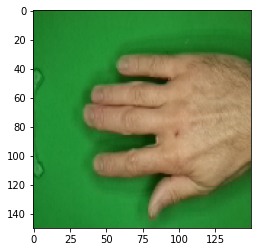

In [43]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
paper = [[1., 0., 0.]]
rock = [[0., 1., 0.]]
# gunting = [[0., 0., 1.]]

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if ((classes == paper).all()):
    print('This is paper')
  elif ((classes == rock).all()):
    print('This is rock')
  else:
    print('This is scissors')

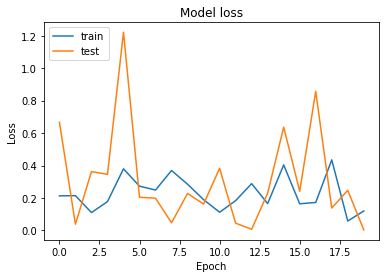

In [44]:
# Plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

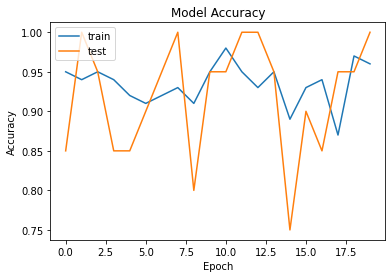

In [45]:
# plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
